In [8]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [20]:
X, y = generateData()

In [21]:
X.shape

(5, 10000)

In [22]:
y.shape

(5, 10000)

In [13]:
x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))

In [18]:
x.shape

(50000,)

In [17]:
x.reshape((5, -1)).shape

(5, 10000)

In [19]:
y.shape

(5, 10000)

In [14]:
np.roll(np.array([0, 1, 1, 1, 1, 0]), 1)

array([0, 0, 1, 1, 1, 1])

In [12]:
generateData()[0].shape

(5, 10000)

In [6]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

cell_state = tf.placeholder(tf.float32, [batch_size, state_size])
hidden_state = tf.placeholder(tf.float32, [batch_size, state_size])
init_state = tf.nn.rnn_cell.LSTMStateTuple(cell_state, hidden_state)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.split(batchX_placeholder, truncated_backprop_length, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

# Forward passes
cell = tf.nn.rnn_cell.BasicLSTMCell(state_size, state_is_tuple=True)
states_series, current_state = tf.contrib.rnn.static_rnn(cell, inputs_series, init_state)

logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [
    tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels)
    for logits, labels in zip(logits_series,labels_series)
]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [9]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Batch loss 0.71169
Step 100 Batch loss 0.59288
Step 200 Batch loss 0.465242
Step 300 Batch loss 0.465243
Step 400 Batch loss 0.342866
Step 500 Batch loss 0.342576
Step 600 Batch loss 0.0507977
New data, epoch 1
Step 0 Batch loss 0.712902
Step 100 Batch loss 0.00908105
Step 200 Batch loss 0.00684016
Step 300 Batch loss 0.00376409
Step 400 Batch loss 0.0022391
Step 500 Batch loss 0.00218354
Step 600 Batch loss 0.00188889
New data, epoch 2
Step 0 Batch loss 0.916338
Step 100 Batch loss 0.00327335
Step 200 Batch loss 0.00174598
Step 300 Batch loss 0.00168221
Step 400 Batch loss 0.00168421
Step 500 Batch loss 0.00167783
Step 600 Batch loss 0.00122626
New data, epoch 3
Step 0 Batch loss 0.798974
Step 100 Batch loss 0.00147352
Step 200 Batch loss 0.00121132
Step 300 Batch loss 0.000824562
Step 400 Batch loss 0.00102485
Step 500 Batch loss 0.000906828
Step 600 Batch loss 0.000957837
New data, epoch 4
Step 0 Batch loss 0.533399
Step 100 Batch loss 0.00100387
Step 200 Ba

Step 500 Batch loss 0.000107143
Step 600 Batch loss 0.000197971
New data, epoch 35
Step 0 Batch loss 0.603049
Step 100 Batch loss 0.000218736
Step 200 Batch loss 0.000193233
Step 300 Batch loss 0.000150867
Step 400 Batch loss 0.00016083
Step 500 Batch loss 0.000127796
Step 600 Batch loss 0.000145265
New data, epoch 36
Step 0 Batch loss 0.432997
Step 100 Batch loss 0.00017567
Step 200 Batch loss 0.000134339
Step 300 Batch loss 0.000155906
Step 400 Batch loss 0.000131579
Step 500 Batch loss 0.000148311
Step 600 Batch loss 0.000211727
New data, epoch 37
Step 0 Batch loss 0.524359
Step 100 Batch loss 0.00017427
Step 200 Batch loss 0.000150557
Step 300 Batch loss 0.000142384
Step 400 Batch loss 0.000125586
Step 500 Batch loss 0.000162566
Step 600 Batch loss 0.000143378
New data, epoch 38
Step 0 Batch loss 0.474185
Step 100 Batch loss 0.000153065
Step 200 Batch loss 0.000127021
Step 300 Batch loss 0.000171141


KeyboardInterrupt: 

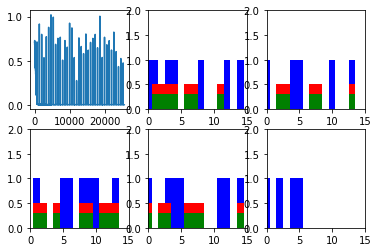

In [10]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_cell_state = np.zeros((batch_size, state_size))
        _current_hidden_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder: batchX,
                    batchY_placeholder: batchY,
                    cell_state: _current_cell_state,
                    hidden_state: _current_hidden_state

                })

            _current_cell_state, _current_hidden_state = _current_state

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Batch loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
# plt.show()
